In [57]:
import pandas as pd
import numpy as np

In [58]:
data = pd.read_csv(r"C:\Users\samba\Downloads\insurance .csv")

In [59]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 1. I think it is Supervised Data, This Belongs to Data of Insurance Charges for region wise, smoking habit wise. 

# 3. Data Cleaning

In [60]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [63]:
data['sex'].replace({'female':0,'male':1},inplace = True)

In [64]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [65]:
data['smoker'].replace({'yes':0,'no':1},inplace = True)

In [66]:
values = list(data['region'].unique())
print(values)
replaced_values= [0,1,2,3]

['southwest', 'southeast', 'northwest', 'northeast']


In [67]:
for (i,j) in zip(values,replaced_values):
    data['region'].replace({i:j},inplace = True)

In [68]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [69]:
columns = list(data.columns)

In [70]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [71]:
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [72]:
for i in columns:
    Q1=data.describe().loc["25%",i]
    Q3=data.describe().loc["75%",i]
    IQR=Q3-Q1
    print(i,data.loc[data[i]<(Q1-IQR*1.5),i].count())
    print(i,data.loc[data[i]>(Q3+IQR*1.5),i].count())
b = (Q3+IQR*1.5)
c = (Q1-IQR*1.5)

age 0
age 0
sex 0
sex 0
bmi 0
bmi 9
children 0
children 0
smoker 274
smoker 0
region 0
region 0
charges 0
charges 139


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

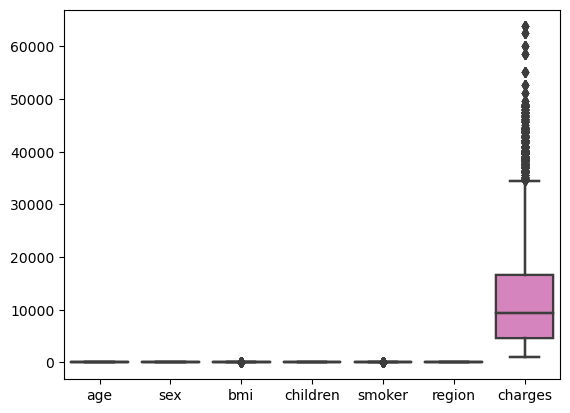

In [74]:
for i in columns:
    sns.boxplot(data = data)
    plt.plot()

In [75]:
data = data.astype(float)

In [76]:
for i in columns:
    data[i].mask((data[i]>b),data[i].median(),inplace =True)
    data[i].mask((data[i]<c),data[i].median(),inplace =True)

# 2.Sample Size

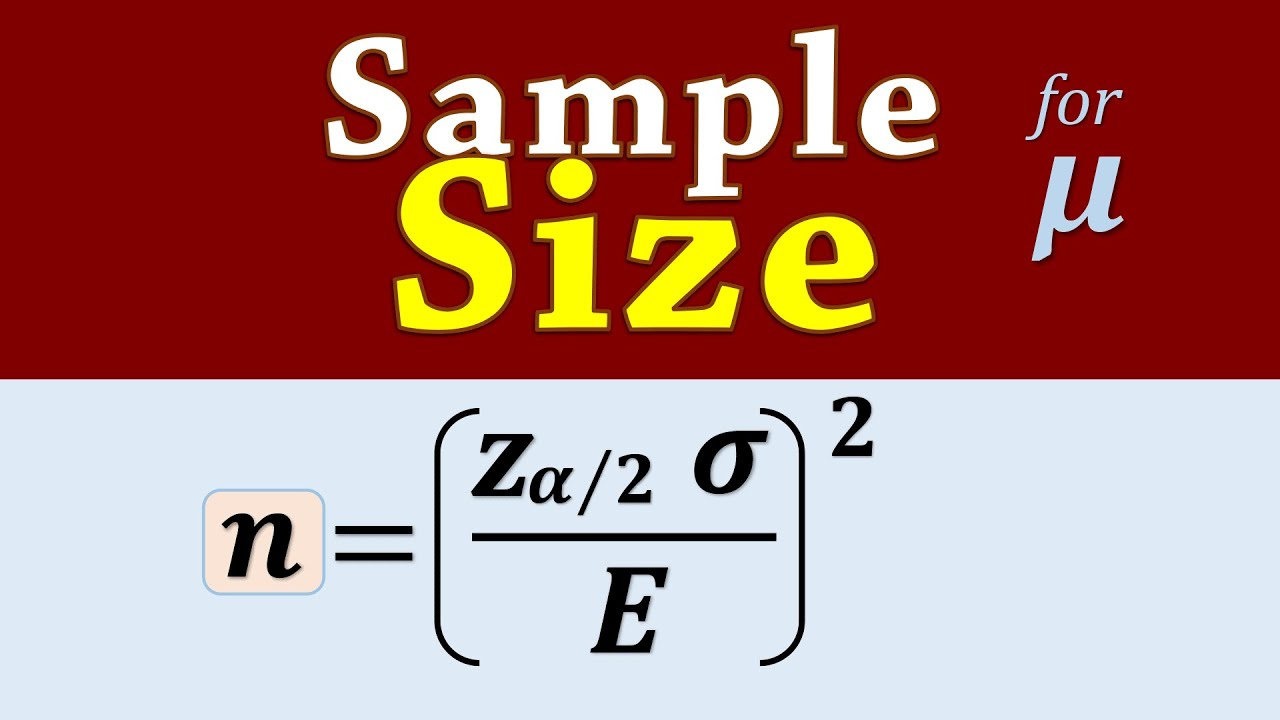

Zalpha for 99% is 2.58 and margin of error is 0.02

In [77]:
def samplesize(z,E,p,q):
    n = ((z/E)**2)*(p*q)
    return 'The Required Sample size of This Data is:',n

In [78]:
samplesize(2.58,0.02,0.5,0.5)

('The Required Sample size of This Data is:', 4160.25)

In [79]:
def samplesize1(z,E,p,q):
    n = ((z**2)*(p*q))/(E**2)
    return 'The Required Sample size of This Data is:',n

In [80]:
samplesize1(2.58,0.02,0.5,0.5)

('The Required Sample size of This Data is:', 4160.25)

# 4. sex and smoking are statistically independent or not.

In [81]:
data['sex'].corr(data['smoker'])

-0.076184816921095

Weak Negative Correlation

In [82]:
import scipy as sp
regr_results = sp.stats.linregress(data['sex'], data['smoker'])
print(regr_results)

LinregressResult(slope=-0.06149108850712378, intercept=0.8262839879154079, rvalue=-0.07618481692109501, pvalue=0.005300369127374137, stderr=0.022017930766149753, intercept_stderr=0.01565026850800771)


In [83]:
res = sp.stats.pearsonr(data['sex'], data['smoker'])
res

PearsonRResult(statistic=-0.07618481692109513, pvalue=0.005300369127376699)

In [84]:
res.confidence_interval()

ConfidenceInterval(low=-0.12924803684106176, high=-0.022686526163279735)

In [85]:
res = sp.stats.spearmanr(data['sex'], data['smoker'])
res

SpearmanrResult(correlation=-0.07618481692109513, pvalue=0.005300369127374057)

# So These are Independent

# 5. all regressor variables (independent variable) are independent of each other or not.

In [86]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.002127,0.413577
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.004588,-0.025282
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.157566,-0.068671
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.016569,0.079165
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.434852
region,-0.002127,-0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.087783
charges,0.413577,-0.025282,-0.068671,0.079165,-0.434852,0.087783,1.000000


# all regressor variables(sex,bmi,children,smoker,region) are independent to each other

# regression plot

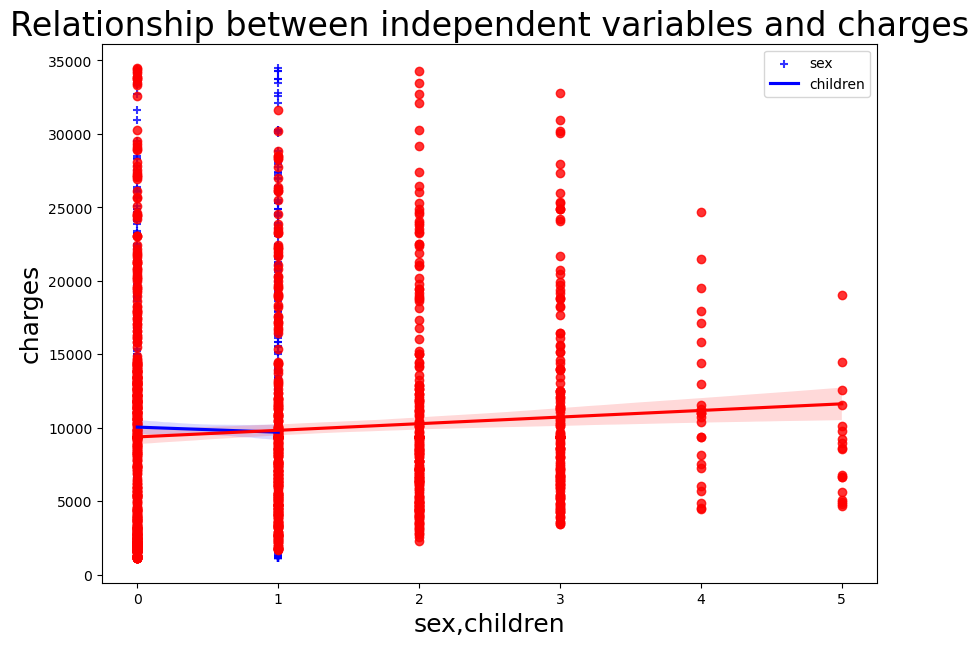

In [87]:
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=data.sex, y=data.charges, color='blue', marker='+')
sns.regplot(x=data.children, y=data.charges, color='red', marker='o')

#Legend, title and labels.
plt.legend(labels=['sex','children'])
plt.title('Relationship between independent variables and charges', size=24)
plt.xlabel('sex,children', size=18)
plt.ylabel('charges', size=18);

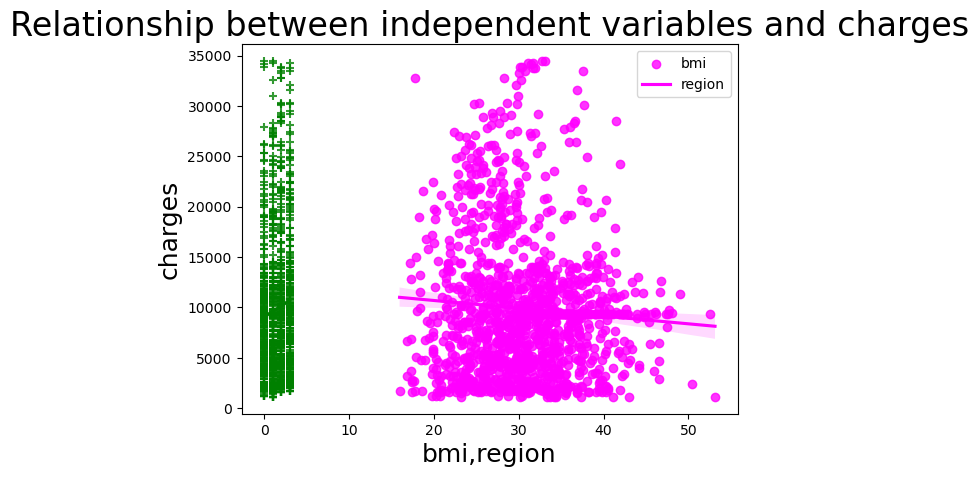

In [88]:
sns.regplot(x=data.bmi, y=data.charges, color='magenta', marker='o')
sns.regplot(x=data.region, y=data.charges, color='green', marker='+')
plt.legend(labels=['bmi','region'])
plt.title('Relationship between independent variables and charges', size=24)
plt.xlabel('bmi,region', size=18)
plt.ylabel('charges', size=18);

# 6. dependency between response and regressors.

In [89]:
correlation = data.corr()

In [90]:
correlation.iloc[6:]

,age,sex,bmi,children,smoker,region,charges
charges,0.413577,-0.025282,-0.068671,0.079165,-0.434852,0.087783,1.0


# The regressors are have Very Weak Relation means It is Independent

#  7.Predict the regression Line to predict the charges for insurance using independent variables.

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [92]:
data1 = data

In [93]:
features = list(['sex','bmi','region','children'])
target = list(["charges"])

x = data[features].values
y = data[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=1)

scaler = MinMaxScaler()
scaler.fit(train_x)
train_x =scaler.transform(train_x)
test_x = scaler.transform(test_x)

linear = LinearRegression()
linear.fit(train_x,train_y.ravel())

pred_linear = linear.predict(test_x)


In [94]:
linear.score(test_x,test_y)

0.028218665415537636

# 8 Predict the accuracy of the regression Model.

In [38]:
#Feature Selection 
y=data.charges.values
X=data[['age', 'bmi', 'smoker', 'children', 'region']]
#Split data into test and train
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
#Scaling numeric features using sklearn StandardScalar
numeric=['age', 'bmi', 'children']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model
print('LR Scores')
print('R2 Score:',r2_score(y_test, ypred),'MAE:',mean_absolute_error(y_test, ypred),'RMSE:',np.sqrt(mean_squared_error(y_test, ypred)))


dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
print('DT Scores')
print('R2 Score:',r2_score(y_test, yhat),'MAE:', mean_absolute_error(y_test, yhat),'RMSE:', np.sqrt(mean_squared_error(y_test, yhat)))

LR Scores
R2 Score: 0.4355914351829667 MAE: 3446.625762065967 RMSE: 5324.607306208492
DT Scores
R2 Score: 0.3762151555673857 MAE: 2388.4333434291057 RMSE: 5597.681646080002


# 10. Give the percentage of error in regression model.

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
from sklearn.metrics import mean_absolute_error as mae

In [43]:
error =mean_squared_error(test_y,pred_linear)

In [44]:
import math
math.sqrt(error)

6734.6826345634945

In [45]:
mae(test_y,pred_linear)

4975.390700074462

### 9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.

In [46]:
features = list(set(data1.columns)-set(['charges']))
target = list(["charges"])

x = data1[features].values
y = data1[target].values

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3,random_state=1)

linear = LinearRegression()
linear.fit(train_x,train_y.ravel())

pred_linear = linear.predict(test_x)

In [47]:
features

['smoker', 'sex', 'children', 'bmi', 'age', 'region']

In [48]:
data1

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,0.0,0.0,16884.92400
1,18.0,1.0,33.770,1.0,1.0,1.0,1725.55230
2,28.0,1.0,33.000,3.0,1.0,1.0,4449.46200
3,33.0,1.0,22.705,0.0,1.0,2.0,21984.47061
4,32.0,1.0,28.880,0.0,1.0,2.0,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,1.0,2.0,10600.54830
1334,18.0,0.0,31.920,0.0,1.0,3.0,2205.98080
1335,18.0,0.0,36.850,0.0,1.0,1.0,1629.83350
1336,21.0,0.0,25.800,0.0,1.0,0.0,2007.94500


In [49]:
import numpy as np

In [50]:
linear.predict(np.array([[29,1,0,28,0,1]])) # replaced values for Female =0, Male = 1, Smoker Yes = 1, No = 0 So entered as per Replaced Values

array([-217519.36064451])

# 10. Give the percentage of error in regression model.

In [51]:
mean_squared_error(test_y,pred_linear)

26922721.471803125

# 11. Give the 95% confidence interval for average charge insurance.

In [52]:
sp.stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=sp.stats.sem(data))

C:\Users\samba\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\samba\AppData\Local\Temp\ipykernel_16876\165331514.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  sp.stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=sp.stats.sem(data))


(array([3.84541985e+01, 4.78432070e-01, 3.03366430e+01, 1.03032491e+00,
        7.73585952e-01, 1.42510284e+00, 9.50367754e+03]),
 array([3.99598523e+01, 5.32031308e-01, 3.09901508e+01, 1.15951067e+00,
        8.16847531e-01, 1.54350703e+00, 1.02384434e+04]))

In [53]:
y = data['charges'].values

In [54]:
data['charges'].mean()

9871.060475447664

In [55]:
sp.stats.norm.interval(alpha=0.95, loc=np.mean(y), scale=sp.stats.sem(y))

C:\Users\samba\AppData\Local\Temp\ipykernel_16876\4223065934.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  sp.stats.norm.interval(alpha=0.95, loc=np.mean(y), scale=sp.stats.sem(y))


(9503.677542393967, 10238.443408501398)

In [1]:
'''Simple linear regression equation 
y=b0+b1x + error 
y is depednent   or outcome variable 
x= independen t or regressosr or explanatory variable 
b0 is interrcept of the regression equation 
b1 is slope of the regression equation 
 and  e is error involed in the model 
    Multiple linrsr regression equation 
     y= bo+b1x1+b2x2+.....+bk+xk 
         k= number of indepednen t variable 
         bo '''

'Simple linear regression equation \ny=b0+b1x + error \ny is depednent   or outcome variable \nx= independen t or regressosr or explanatory variable \nb0 is interrcept of the regression equation \nb1 is slope of the regression equation \n and  e is error involed in the model \n    Multiple linrsr regression equation \n     y= bo+b1x1+b2x2+.....+bk+xk \n         k= number of indepednen t variable \n         bo '